In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv("Crop_recommendation.csv")

In [4]:
print(dataset.head(5))
print(dataset.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.

In [5]:
print(dataset['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [6]:
dataset.shape

(2200, 8)

In [7]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
x = dataset.drop('label', axis=1)
y = dataset['label']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

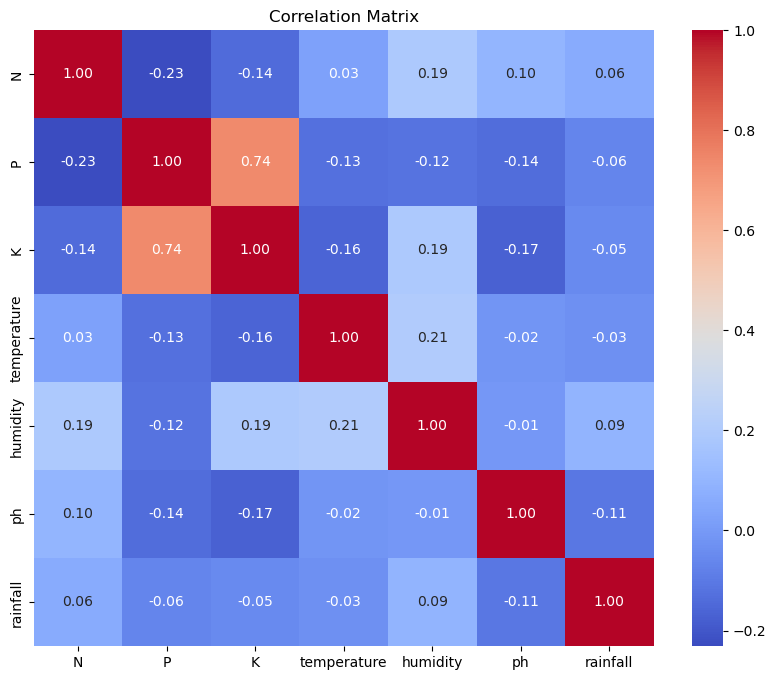

In [10]:
numeric_df = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.5)

In [12]:

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
print(rf_model.score(X_train, y_train) * 100)
print(rf_model.score(X_test, y_test) * 100)

100.0
99.36363636363636


Accuracy Score: 0.9936363636363637

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        49
           8       0.91      0.98      0.94        49
           9       1.00      1.00      1.00        57
          10       1.00      0.98      0.99        44
          11       1.00      1.00      1.00        47
          12       1.00      1.00      1.00        51
          13       0.98      1.00      0.99        54
          14       1.00      1.00      1.00        46
          15       1.00      1.00      1.00        46
          16       1.

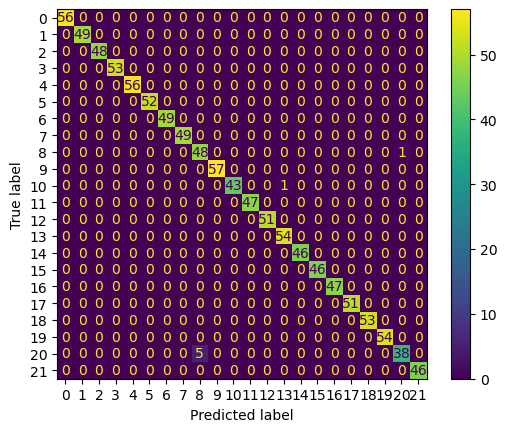

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = rf_model.predict(X_test)

#Accuracy Score:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [16]:
rf_model.predict([[40, 68, 80, 19, 17, 7.3, 80]])

c:\Users\isang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

In [17]:
import joblib

joblib.dump(rf_model, "crop_prediction_model.pkl")


['crop_prediction_model.pkl']

In [ ]:
#rf_model = joblib.load("crop_prediction_model.pkl")